## Loading and Preprocessing Image

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL

import keras
from keras import layers
from keras.models import Sequential
import pathlib

2024-05-31 13:22:29.955432: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-31 13:22:29.961420: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 13:22:30.001145: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-31 13:22:30.361525: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 13:22:31.505316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

### Download and explore the dataset
The dataset contains seven sub-directories inside the train directory, one per class: 

In [2]:
#Setting directory
data_dir = pathlib.Path("./train_all").with_suffix('')

In [3]:
#Image count in the train data
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1570


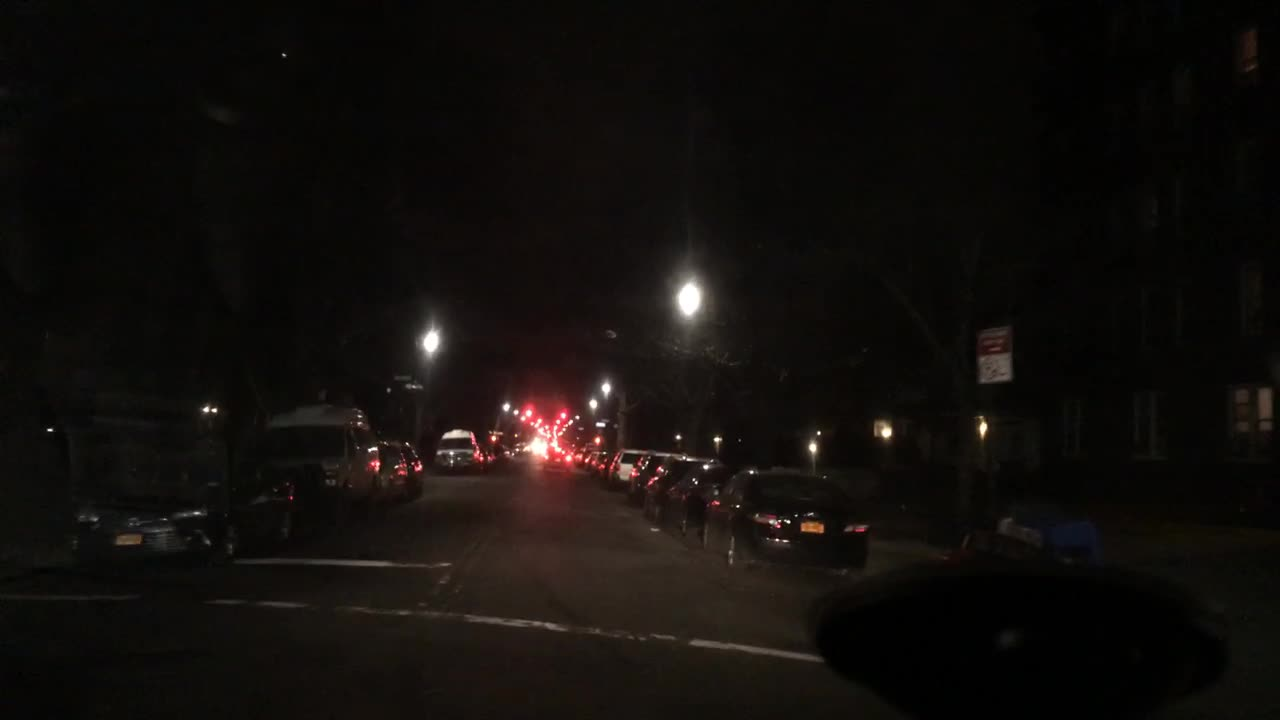

In [4]:
#Visualising an image from clear subfolder
clear = list(data_dir.glob('clear/*.jpg'))
PIL.Image.open(str(clear[0]))

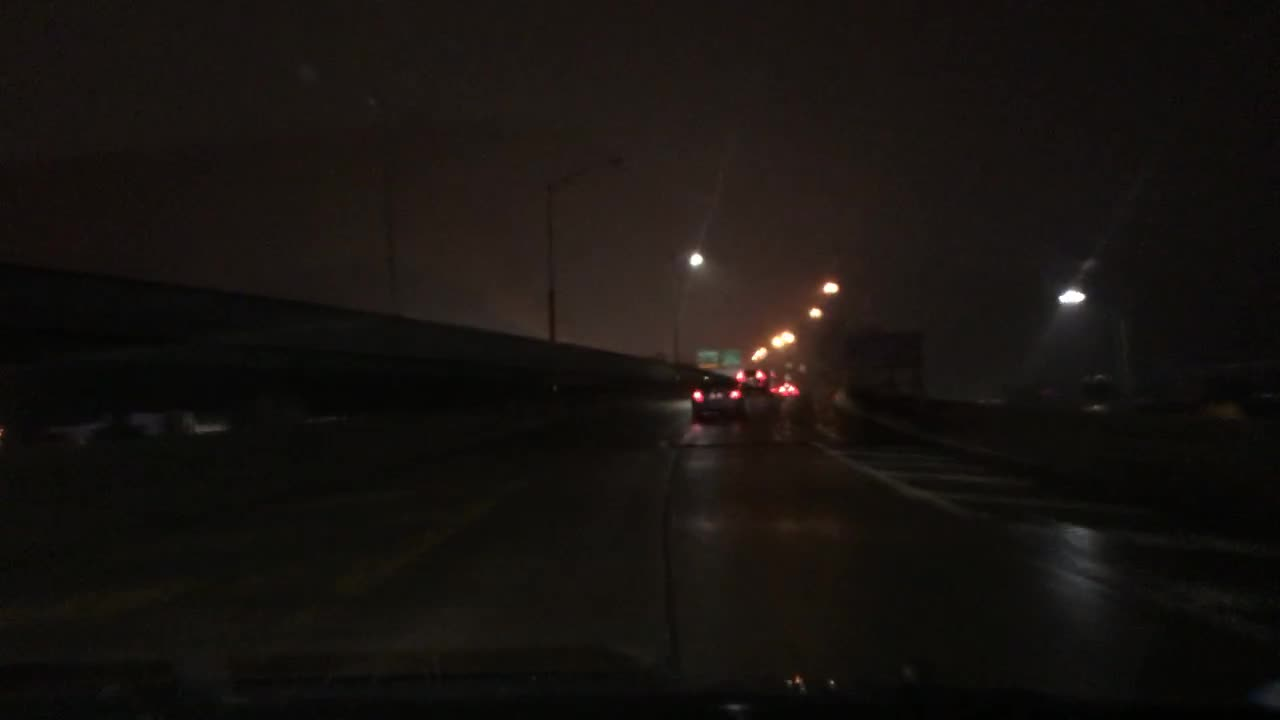

In [6]:
#Visulaising an image from foggy subfolder
foggy = list(data_dir.glob('foggy/*.jpg'))
PIL.Image.open(str(foggy[0]))

### Load data using a Keras utility

##### Defining the parameters for the dataset. 

Resizing the image into 128 x 72 by keeping the ratio of original image. 

The data will be loaded from the disk in batches with each batch containing 256 images. So there is no need to specify batch_size while training the model.

In [3]:
#Setting batch size and heoght and width of images
batch_size = None
img_height = 72
img_width = 128

##### Create dataset

The dataset will be splitted between 60% training and 40% validation. The validation dataset need to be further divided 50:50 for testing and validation. This splitting would result in 60% train, 20% val and 20% test

In [4]:
#creating a training dataset with 60% split. 
train_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0,
  #subset="training",
  seed=41,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7088 files belonging to 7 classes.


In [7]:
data_dir = pathlib.Path("./test_all").with_suffix('')
test_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0,
  #subset="training",
  seed=41,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1527 files belonging to 7 classes.


In [8]:
data_dir = pathlib.Path("./val").with_suffix('')
val_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0,
  #subset="training",
  seed=41,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1515 files belonging to 7 classes.


The class names in the class_names attribute of these train and validation dataset correspond to the directory names in alphabetical order.

In [5]:
#class names

class_names = train_ds.class_names
print("Class names in training data ",class_names)

#class_names = val_ds.class_names
#print("Class names in validation data ",class_names)

Class names in training data  ['clear', 'foggy', 'overcast', 'partly cloudy', 'rainy', 'snowy', 'unknown']


### Class distribution

Visualising the count of images in each class of train and validation dataset to ensure both the data has same class distribution

2024-05-31 13:23:05.781023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/tmp/ipykernel_82776/2951802352.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(classnames,rotation = 45) #rotating 45 degree


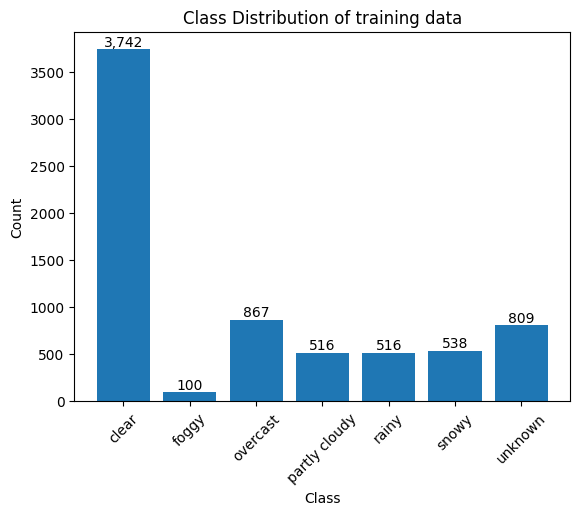

In [6]:
#Distribution of training data

# Extract labels from the dataset
labels = [y.numpy() for _, y in train_ds]

# Calculate class distribution
unique_classes, class_counts = np.unique(labels, return_counts=True)

classnames = train_ds.class_names

# Plot the distribution
fig, ax = plt.subplots()
bar_container = ax.bar(classnames, class_counts)
ax.set(xlabel = 'Class', ylabel='Count', title='Class Distribution of training data')
ax.set_xticklabels(classnames,rotation = 45) #rotating 45 degree

ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()


2024-05-31 13:32:22.109736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/tmp/ipykernel_82776/838472592.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(classnames,rotation = 45) #rotating 45 degree


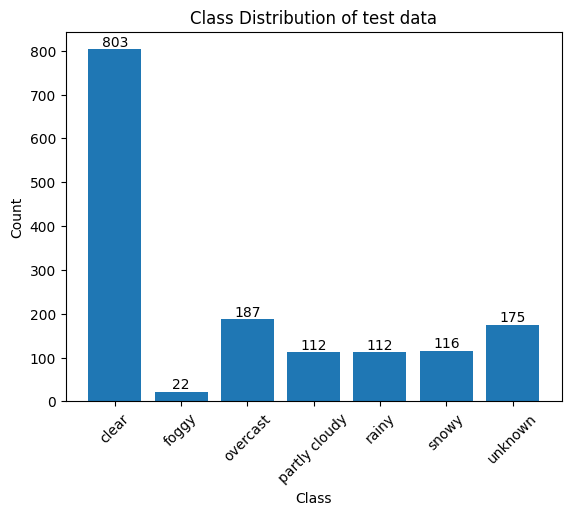

In [12]:
#Distribution of validation data

# Extract labels from the dataset
labels = [y.numpy() for _, y in test_ds]

# Calculate class distribution
unique_classes, class_counts = np.unique(labels, return_counts=True)

classnames = val_ds.class_names

# Plot the distribution
fig, ax = plt.subplots()
bar_container = ax.bar(classnames, class_counts)
ax.set(xlabel = 'Class', ylabel='Count', title='Class Distribution of test data')
ax.set_xticklabels(classnames,rotation = 45) #rotating 45 degree

ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()


2024-05-31 13:31:51.268865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/tmp/ipykernel_82776/1367599291.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(classnames,rotation = 45) #rotating 45 degree


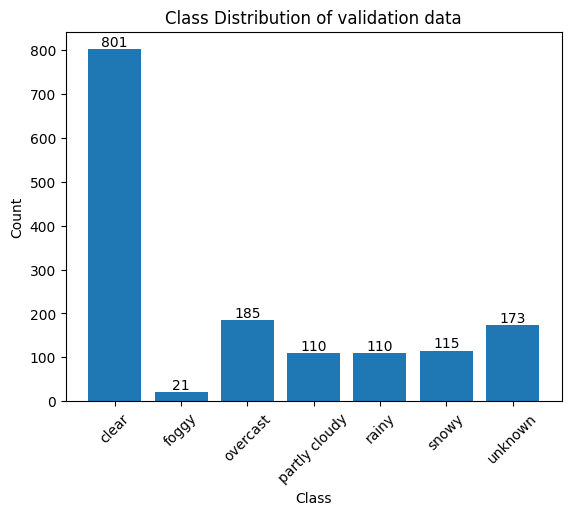

In [10]:
#Distribution of validation data

# Extract labels from the dataset
labels = [y.numpy() for _, y in val_ds]

# Calculate class distribution
unique_classes, class_counts = np.unique(labels, return_counts=True)

classnames = val_ds.class_names

# Plot the distribution
fig, ax = plt.subplots()
bar_container = ax.bar(classnames, class_counts)
ax.set(xlabel = 'Class', ylabel='Count', title='Class Distribution of validation data')
ax.set_xticklabels(classnames,rotation = 45) #rotating 45 degree

ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()


### Visualization

2024-05-22 04:04:23.799925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


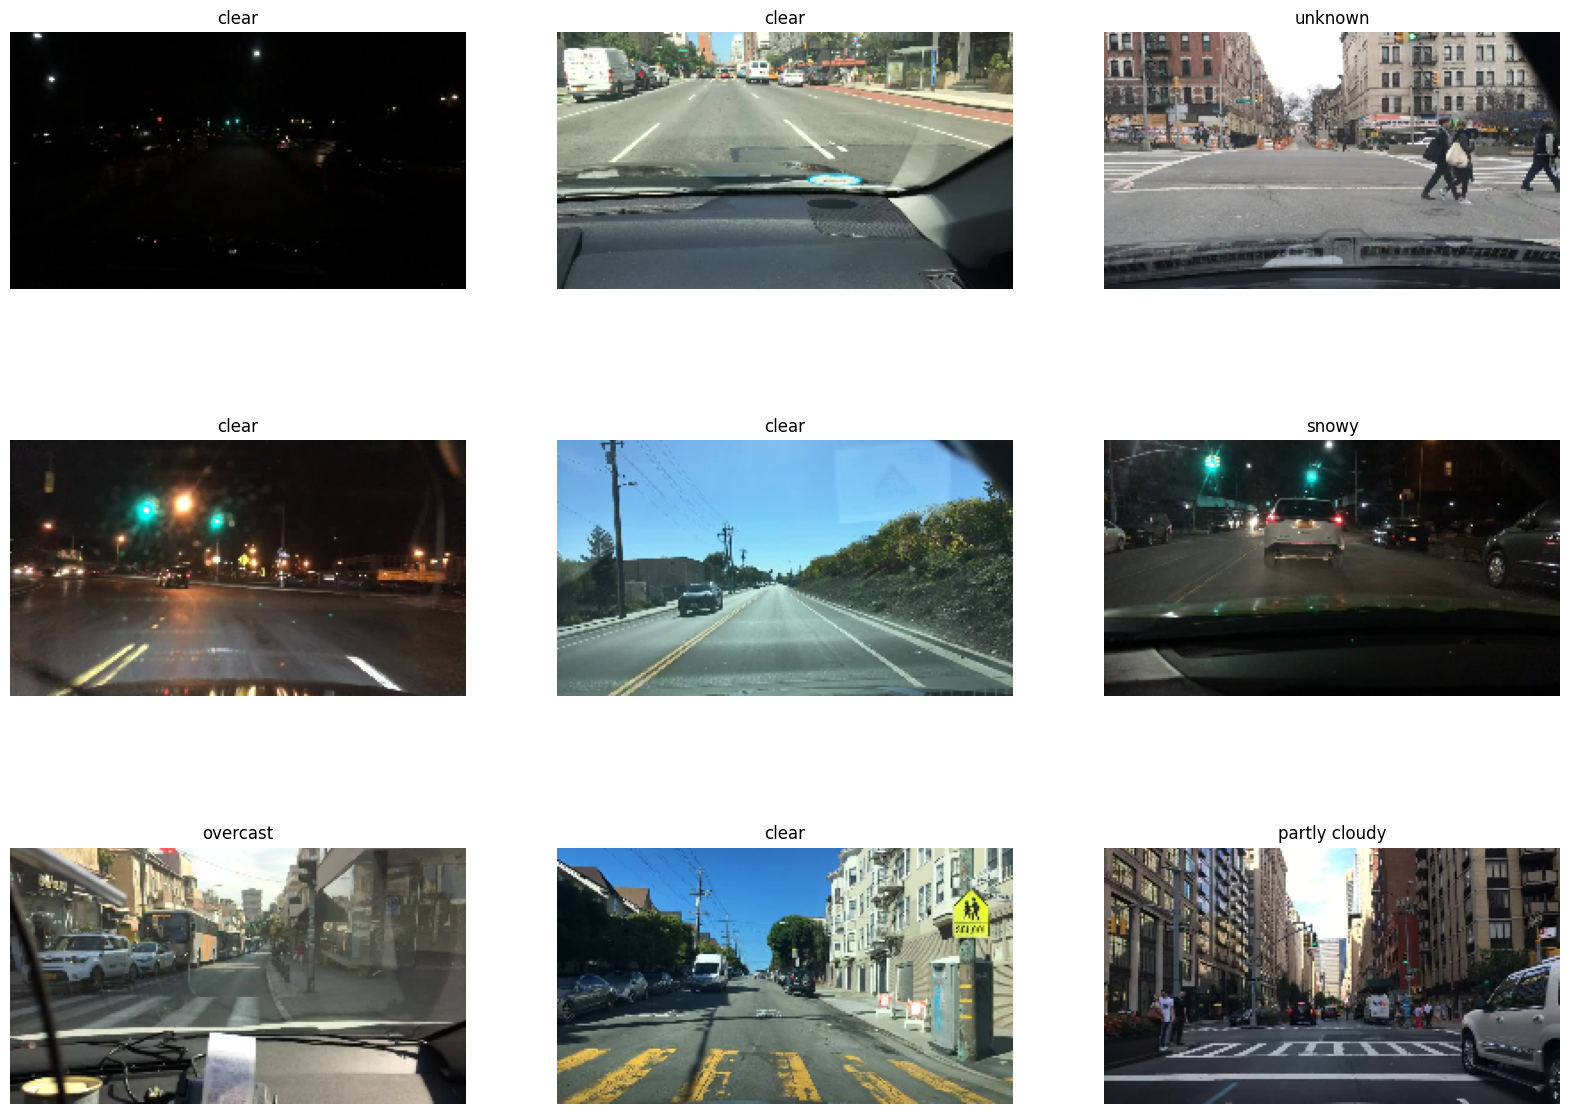

In [17]:
#visualising training data with labels
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

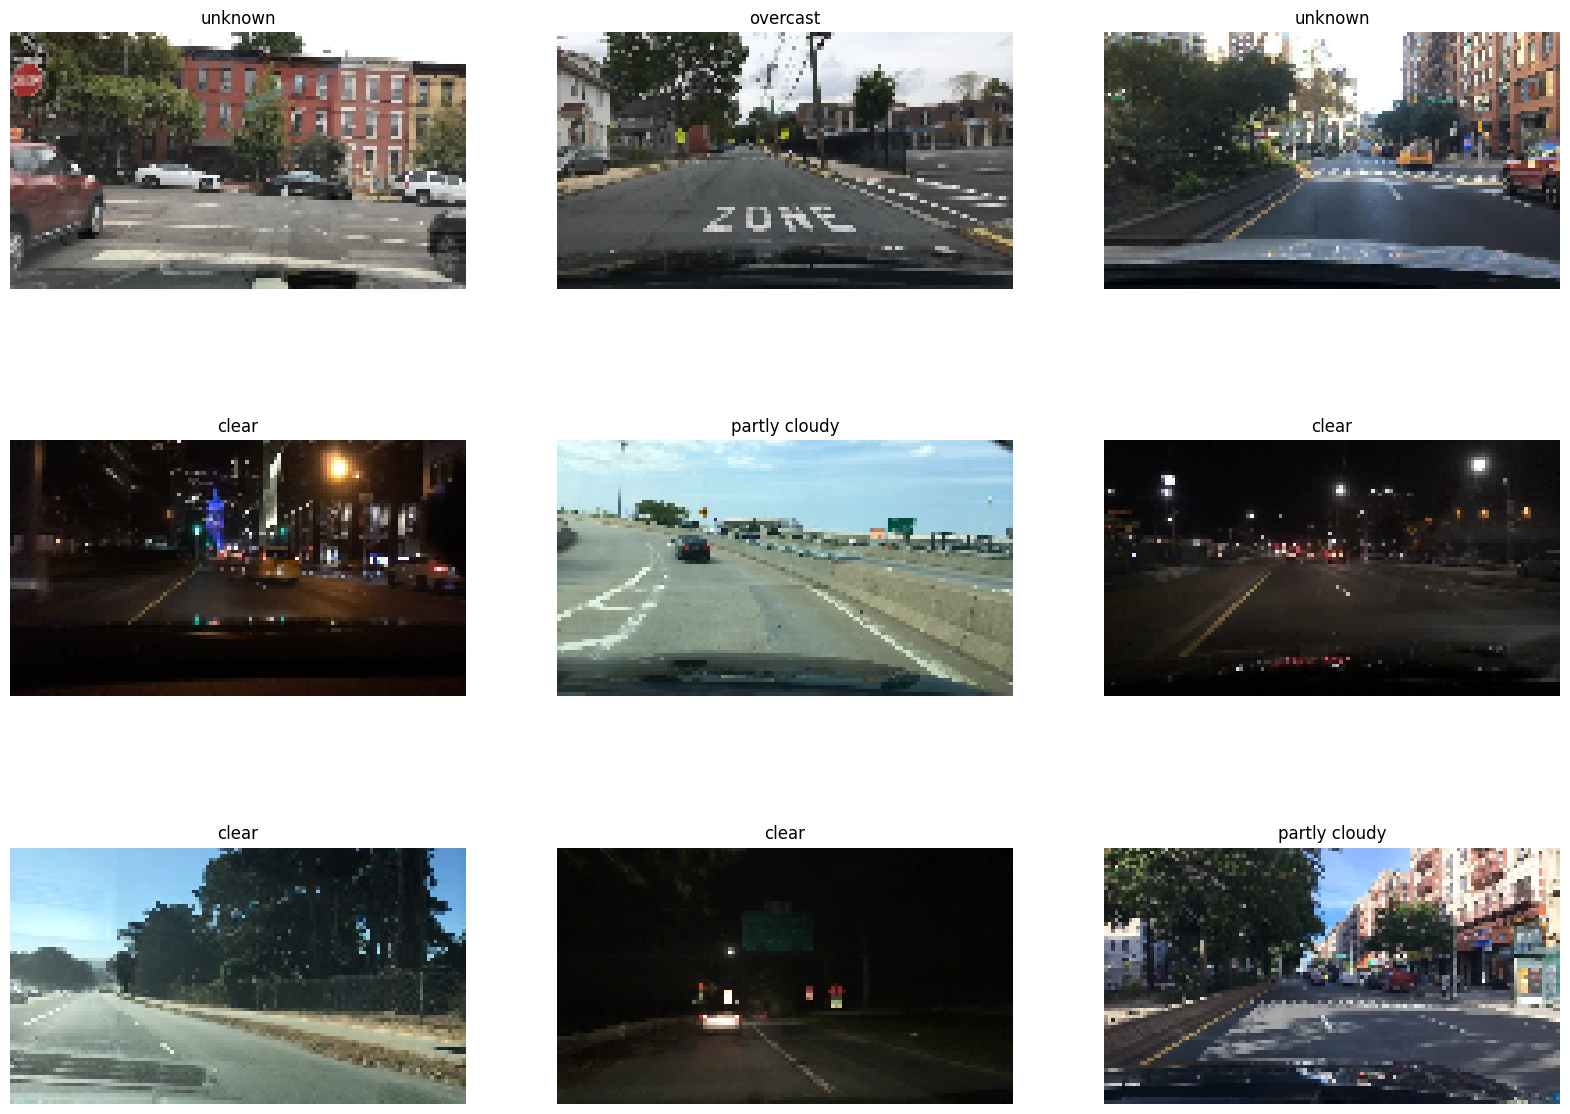

In [12]:
#visualising validation data with labels
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(144, 256, 3)
()


The image_batch is a tensor of the shape (256, 72, 128, 3). This is a batch of 256 images of shape 72x128x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (256,), these are corresponding labels to the 256 images.

## LDA and PCA network

In [6]:
# Splitting X and Y and converting them into numpy array
train_Y = np.array([y.numpy() for x, y in train_ds])
train_X = np.array([x.numpy() for x, y in train_ds])

2024-05-23 12:42:46.103119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-23 12:42:47.423598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
print(train_X.shape)
print(train_Y.shape)

(1570, 72, 128, 3)
(1570,)


In [8]:
#vectorising images
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

train_X_vec = vectorise(train_X)
print(train_X_vec.shape)

(1570, 27648)


In [10]:
from sklearn import decomposition
from time import process_time 

# get a start time
time_1 = process_time()

#First we will reduce dimension using pca
pca = decomposition.PCA()
pca.fit(train_X_vec)
time_2 = process_time()

time_3 = process_time()
train_pca = pca.transform(train_X_vec)
time_4 = process_time()

print('Time to fit pca:   %f seconds' % (time_2 - time_1))
print('Inference time -pca:   %f seconds' % (time_4 - time_3))

Time to fit pca:   99.451722 seconds
Inference time -pca:   7.352527 seconds


In [11]:
cumulative_sum = np.cumsum(pca.explained_variance_ratio_, axis=0)

# Obtaining the variables that explain 95% of the variance in the train data
#variance explained
top90 = np.where(cumulative_sum > 0.90)[0][0]
print('90% in ' + '%d' % (top90+1) + ' components')
top95 = np.where(cumulative_sum > 0.95)[0][0]
print('95% in ' + '%d' % (top95+1) + ' components')
top99 = np.where(cumulative_sum > 0.99)[0][0]
print('99% in ' + '%d' % (top99+1) + ' components')

90% in 332 components
95% in 651 components
99% in 1207 components


In [12]:
train_95 = train_pca[:, 0:top95]

In [13]:
from sklearn import discriminant_analysis

time_5 = process_time()
#computing and  applying lda
lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(train_95, train_Y)
time_6 = process_time()


In [14]:
time_7 = process_time()
transform_lda_train = lda.transform(train_95)
time_8 = process_time()

print('Time to fit lda:   %f seconds' % (time_6 - time_5))
print('Inference time -lda:   %f seconds' % (time_8 - time_7))

Time to fit lda:   3.730269 seconds
Inference time -lda:   0.084119 seconds


In [15]:
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 12])
    ax = fig.add_subplot(1, 2, 1)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_train, Y_train, normalize='true', ax=ax)
    conf.ax_.set_title('Training Set Performance');
    ax = fig.add_subplot(1, 2, 2)
    conf = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, normalize='true', ax=ax)
    conf.ax_.set_title('Test Set Performance');
    pred = model.predict(X_test)
    print('Test Accuracy: ' + str(sum(pred == Y_test)/len(Y_test)))

In [16]:
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

cknn_lda = KNeighborsClassifier(n_neighbors=10, weights='distance')
cknn_lda.fit(transform_lda_train, train_Y)
#eval_model(cknn_lda, transform_lda_train, train_Y) 

KNeighborsClassifier(n_neighbors=10, weights='distance')

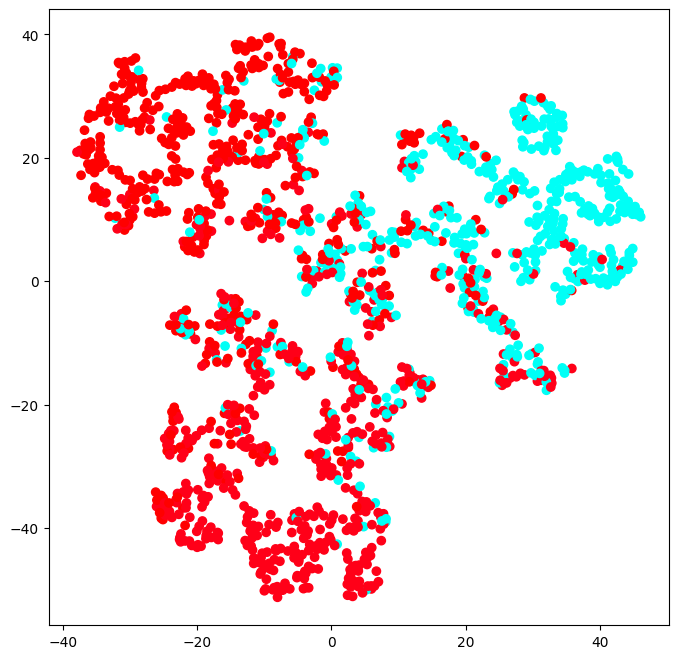

In [17]:
embeddings = TSNE(random_state=4).fit_transform(transform_lda_train)

plt.figure(figsize=[8, 8])
plt.scatter(embeddings[:,0], embeddings[:,1], c=train_Y, cmap='hsv')
#ax.set_title('Top 2 PCA')
plt.show()

## loading test set and checking performance

In [18]:
#Setting directory
data_dir = pathlib.Path("./test").with_suffix('')

#creating a testing dataset. 
test_ds = keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0,
  #subset="training",
  seed=41,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 340 files belonging to 3 classes.


In [19]:
# Splitting X and Y and converting them into numpy array
test_Y = np.array([y.numpy() for x, y in test_ds])
test_X = np.array([x.numpy() for x, y in test_ds])

2024-05-23 12:44:14.957366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-23 12:44:15.272355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
print(test_X.shape)
print(test_Y.shape)

(340, 72, 128, 3)
(340,)


In [21]:
#vectorising images
def vectorise(images):
    # use numpy's reshape to vectorise the data
    return np.reshape(images, [len(images), -1])

test_X_vec = vectorise(test_X)
print(test_X_vec.shape)

(340, 27648)


In [22]:
#First we will reduce dimension using pca
time_3 = process_time()
test_pca = pca.transform(test_X_vec)
time_4 = process_time()

#print('Time to fit pca:   %f seconds' % (time_2 - time_1))
print('Inference time -pca:   %f seconds' % (time_4 - time_3))

Inference time -pca:   3.677696 seconds


In [23]:
test_95 = test_pca[:, 0:top95]
transform_lda_test = lda.transform(test_95)

Test Accuracy: 0.3588235294117647


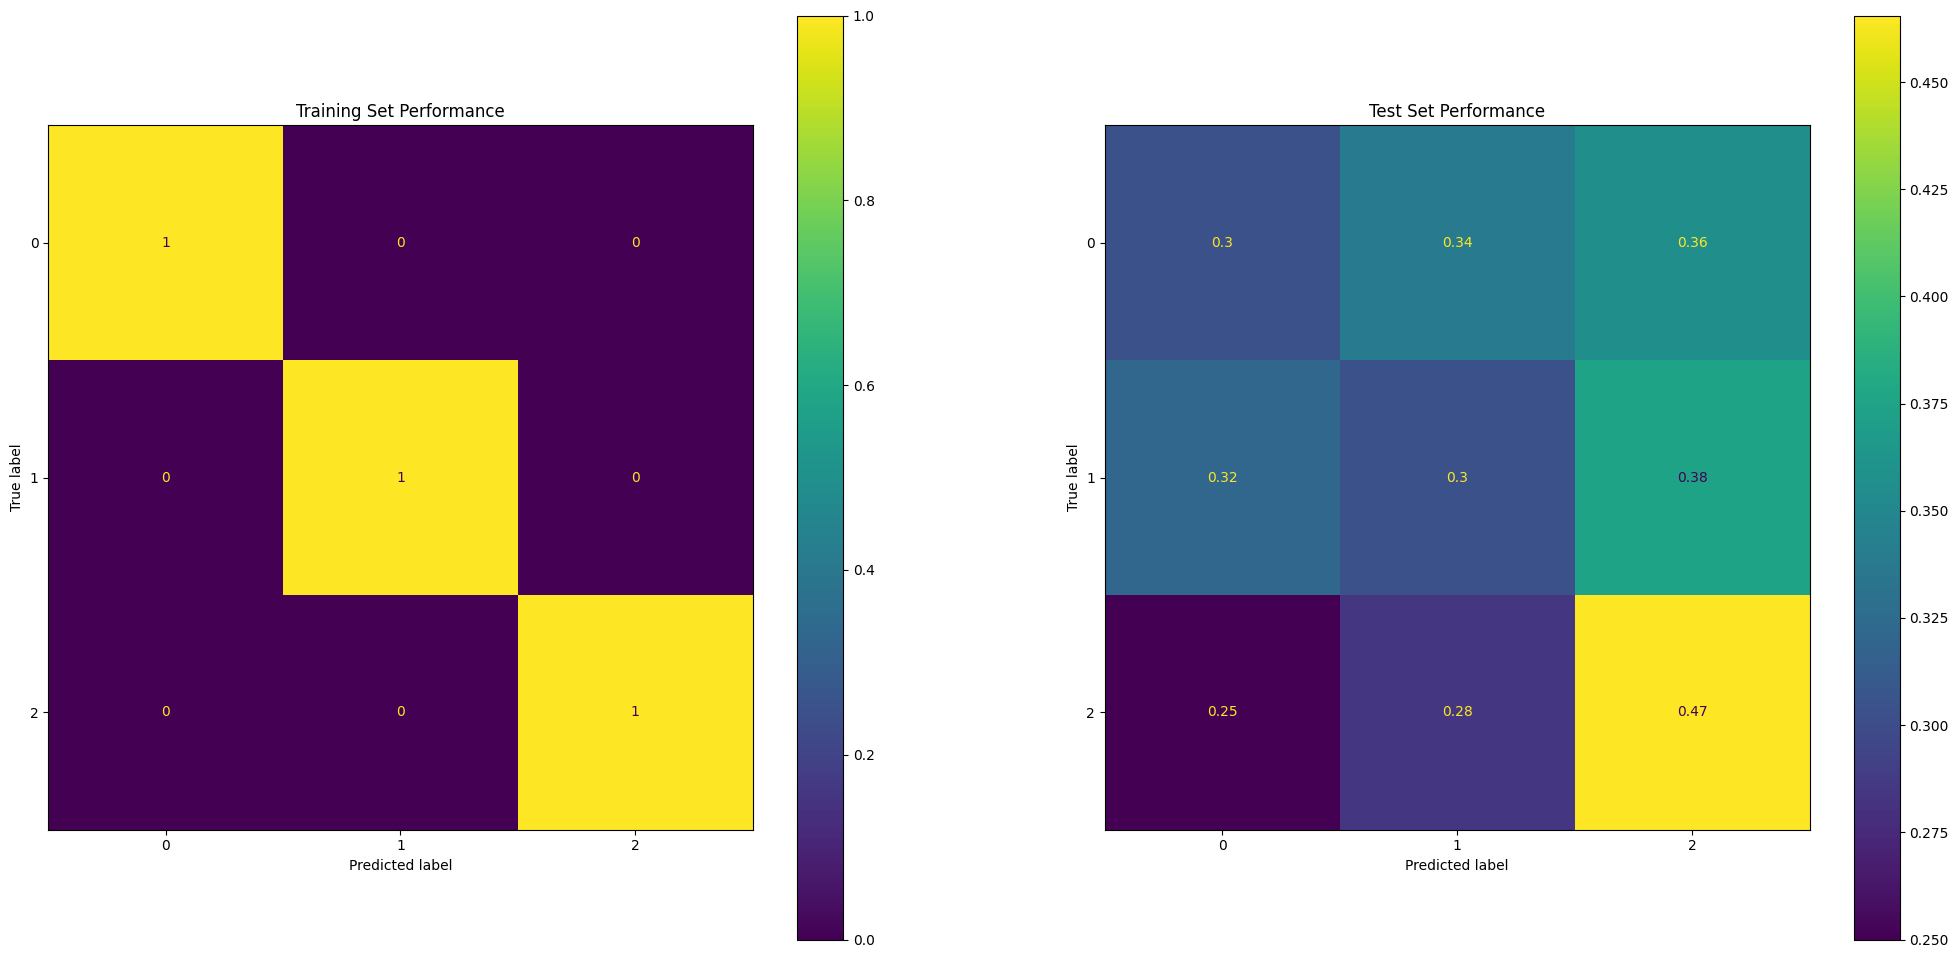

In [24]:
eval_model(cknn_lda, transform_lda_train, train_Y, transform_lda_test, test_Y) 

##### Random Forest

Test Accuracy: 0.35


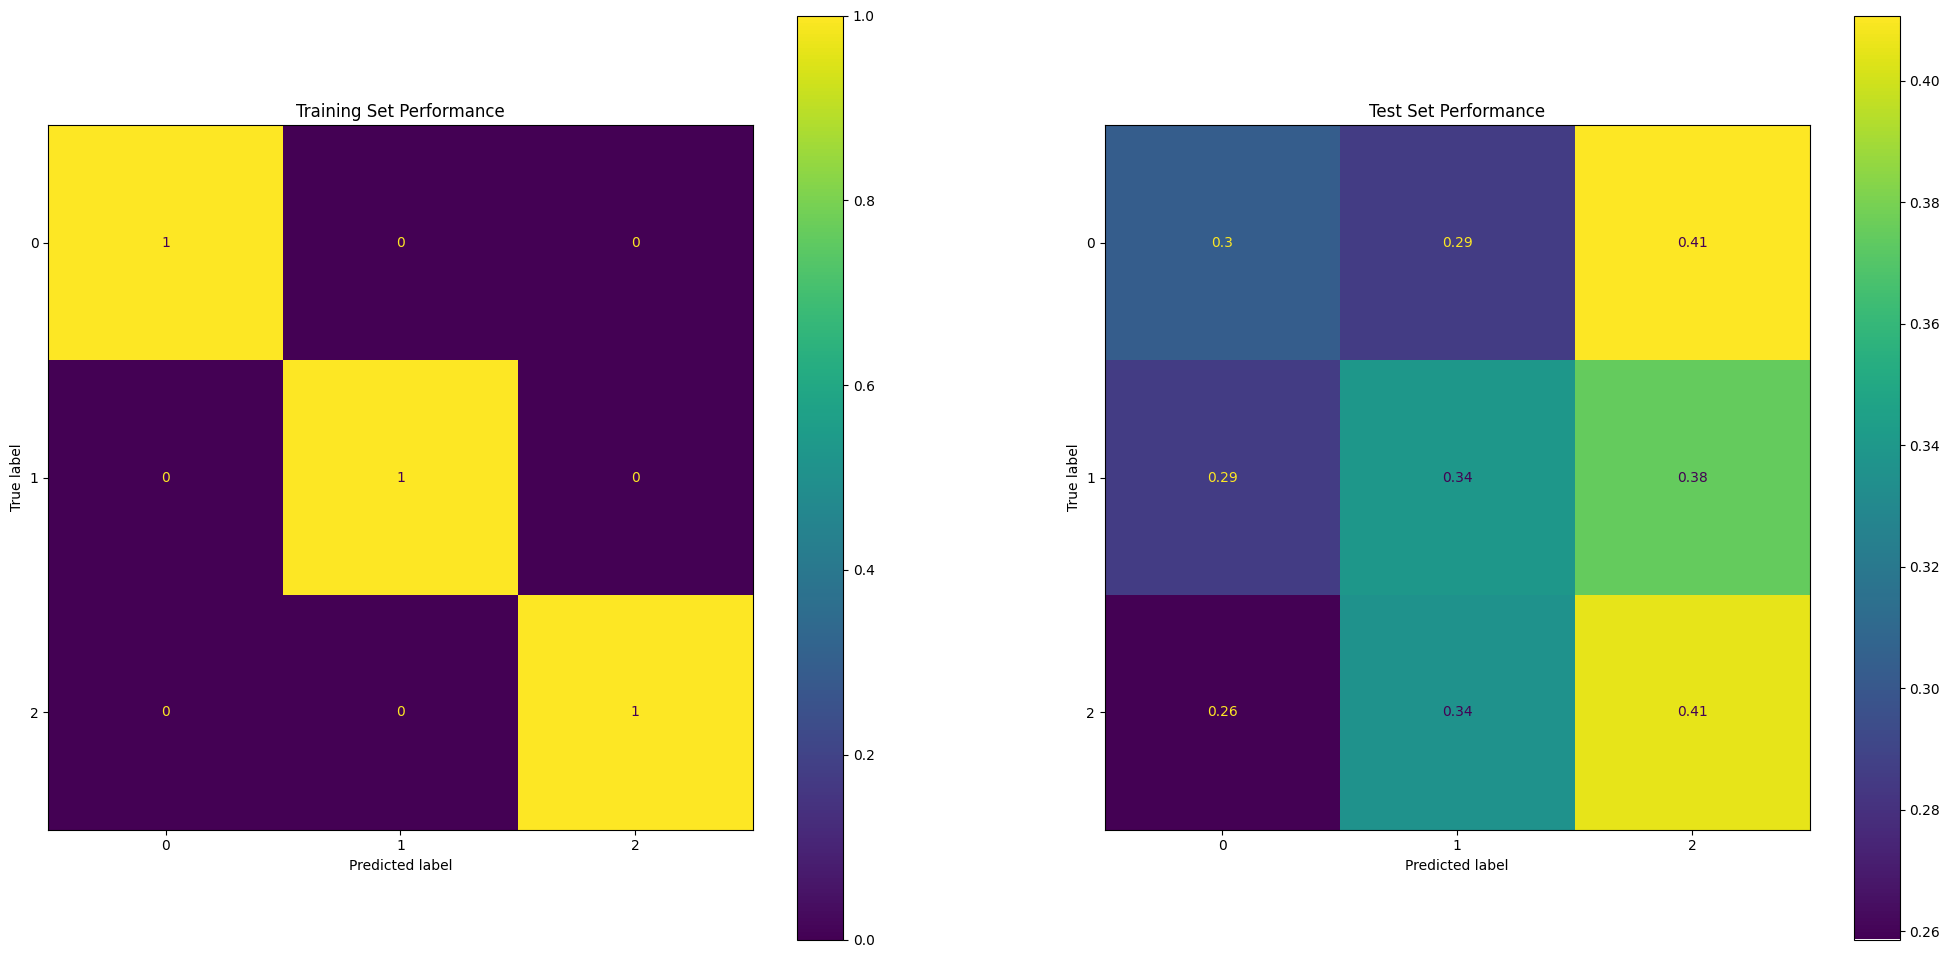

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=41, class_weight="balanced")
rf.fit(transform_lda_train, train_Y)
eval_model(rf, transform_lda_train, train_Y, transform_lda_test, test_Y) 

#### using 99 variance

In [27]:
train_99 = train_pca[:, 0:top99]
test_99 = test_pca[:, 0:top99]

lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(train_99, train_Y)

transform_lda_train = lda.transform(train_99)
transform_lda_test = lda.transform(test_99)

Test Accuracy: 0.3558823529411765


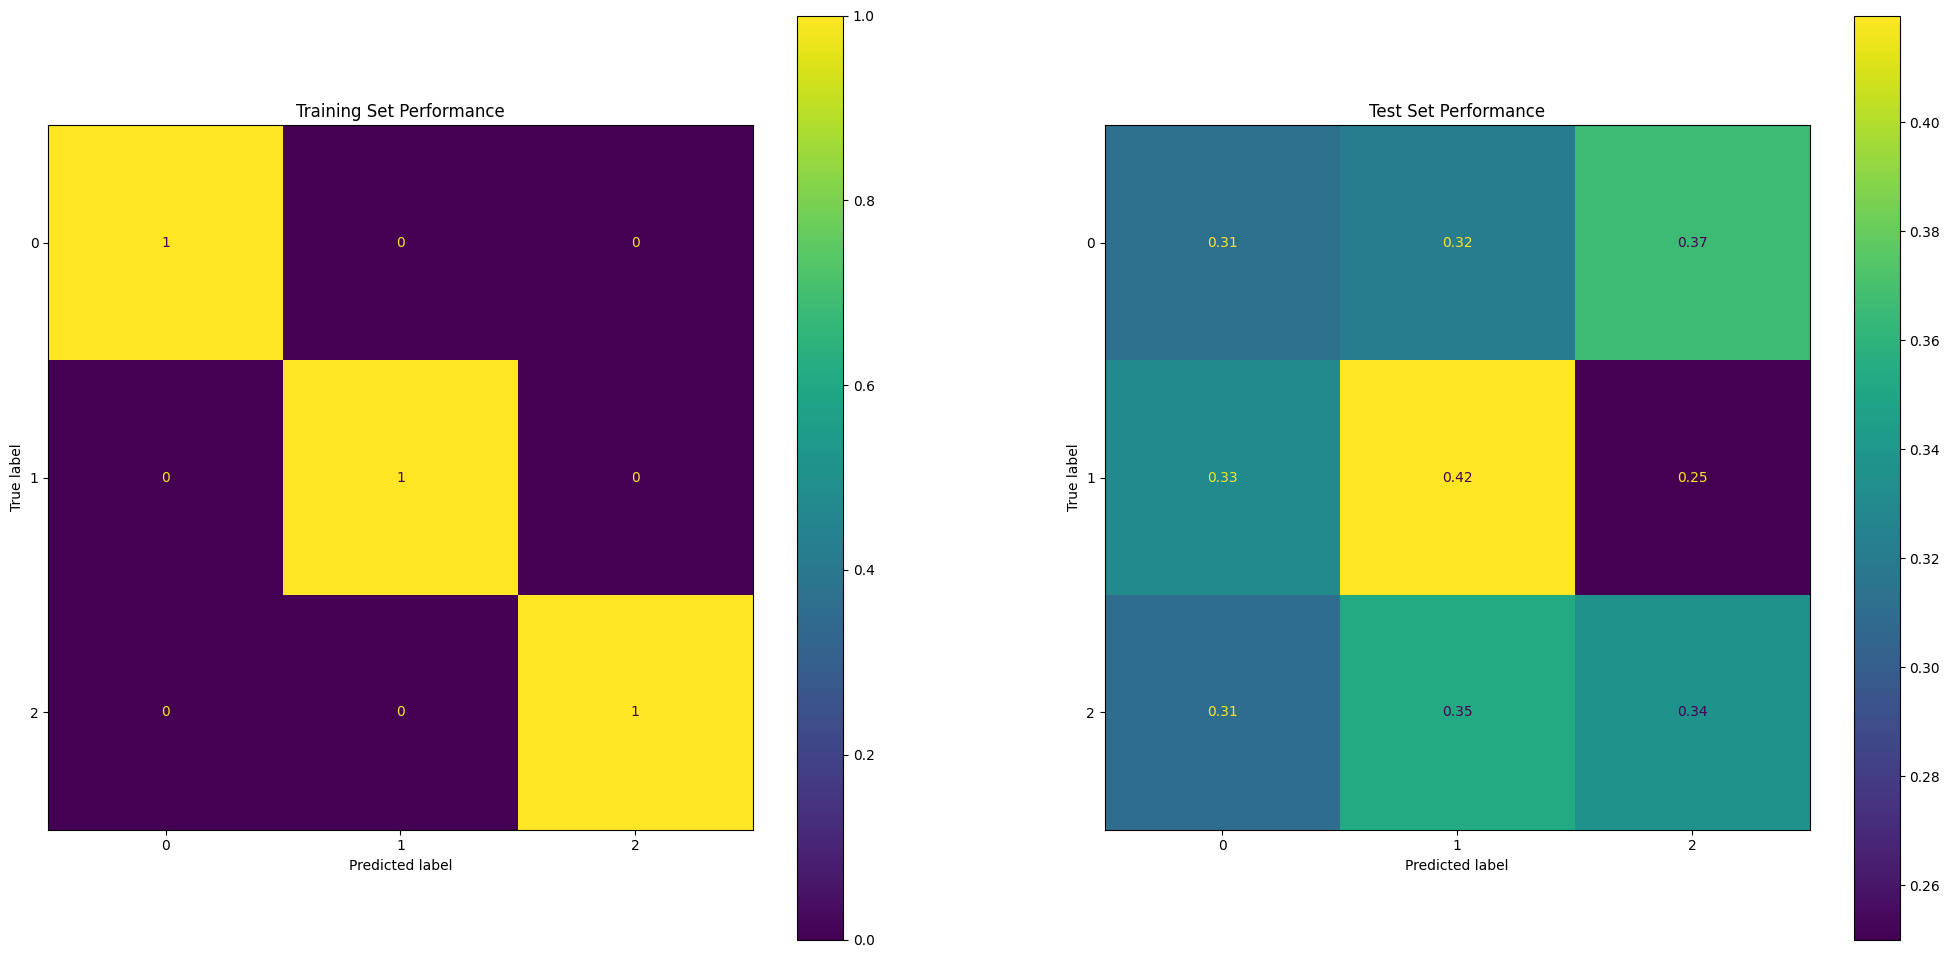

In [28]:
#using cknn
cknn_lda.fit(transform_lda_train, train_Y)
eval_model(cknn_lda, transform_lda_train, train_Y, transform_lda_test, test_Y) 

In [45]:
np.unique(train_Y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

Test Accuracy: 0.36470588235294116


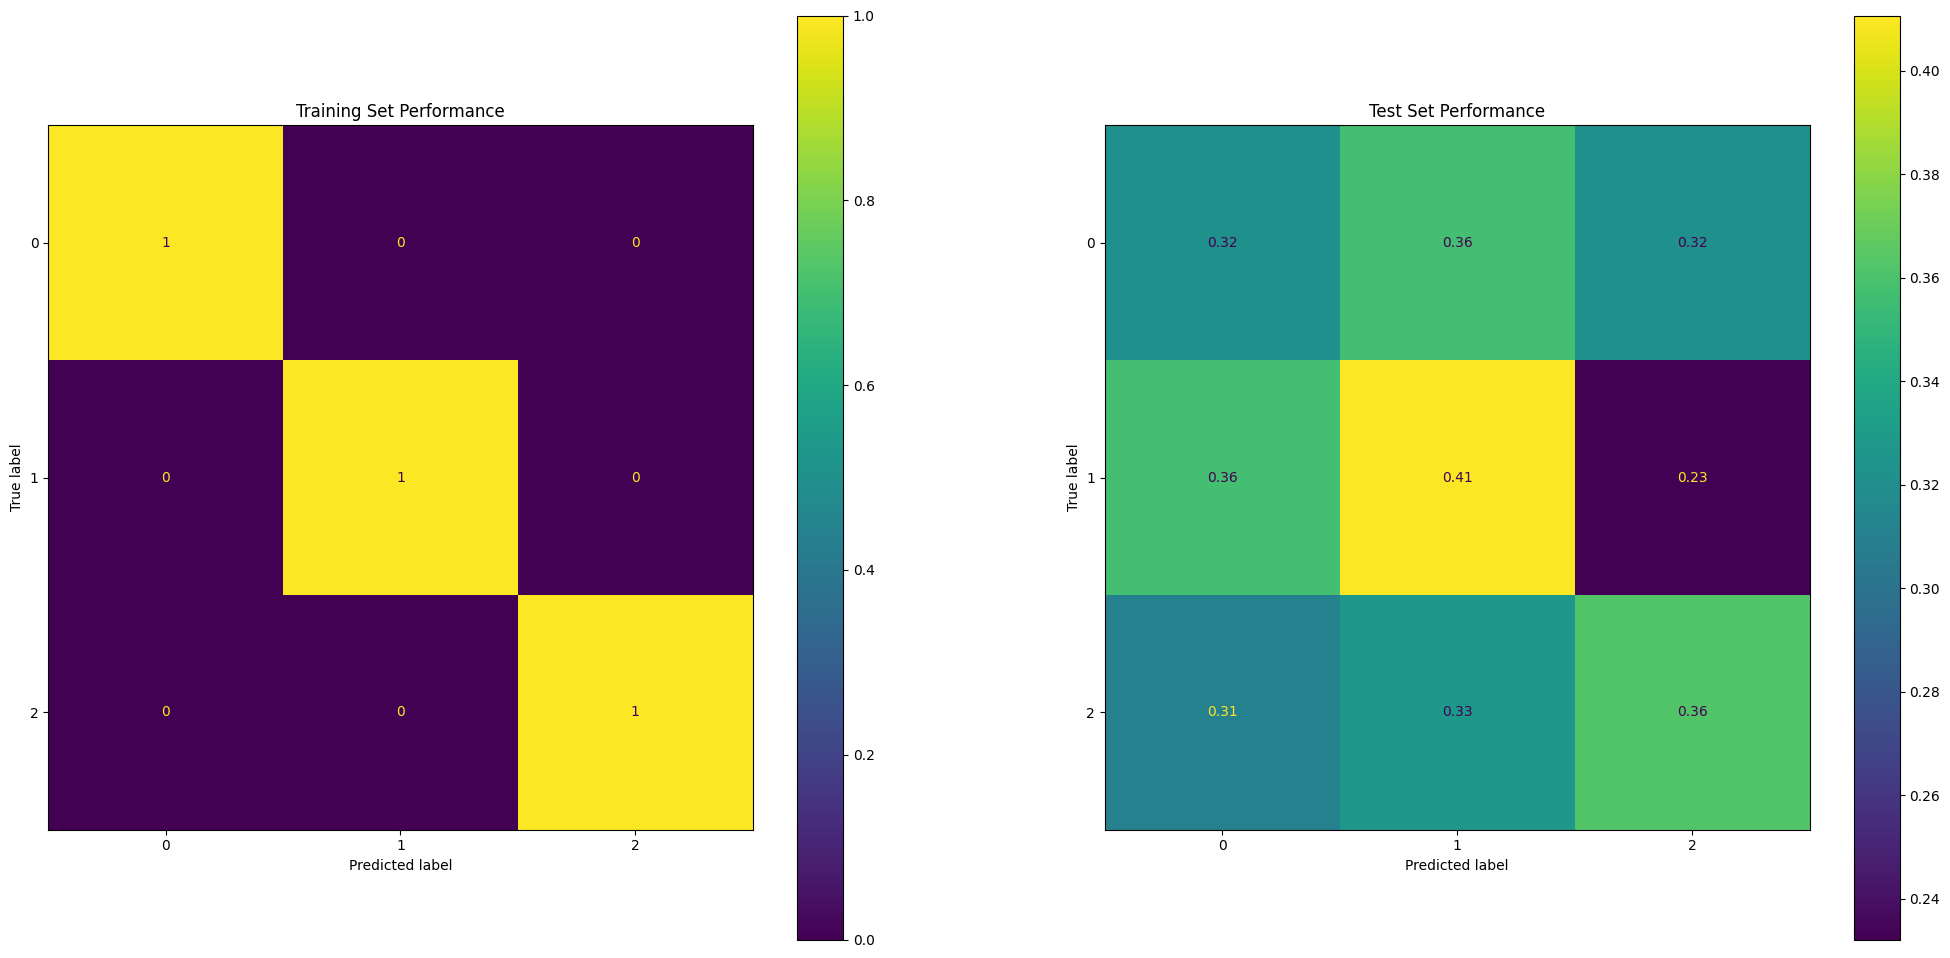

In [29]:
rf = RandomForestClassifier(n_estimators=500, random_state=41, class_weight="balanced")
rf.fit(transform_lda_train, train_Y)



eval_model(rf, transform_lda_train, train_Y, transform_lda_test, test_Y) 

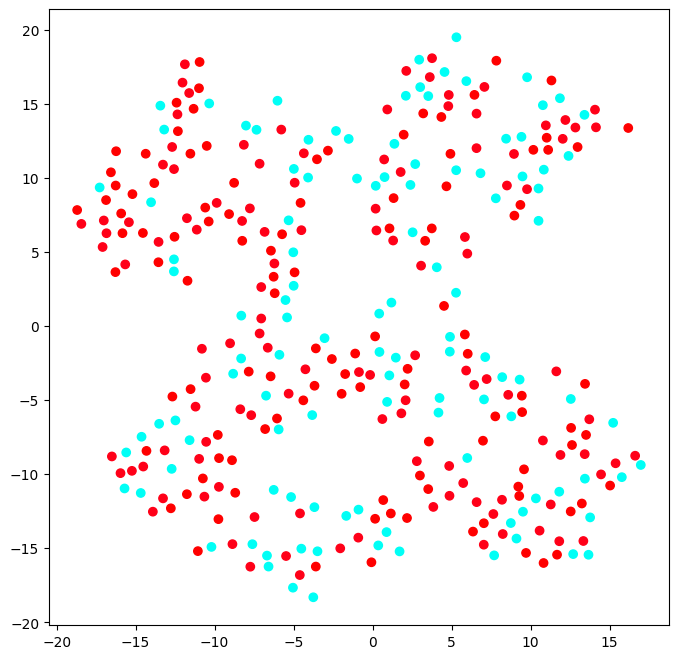

In [30]:
embeddings = TSNE(random_state=4).fit_transform(transform_lda_test)

plt.figure(figsize=[8, 8])
plt.scatter(embeddings[:,0], embeddings[:,1], c=test_Y, cmap='hsv')
#ax.set_title('Top 2 PCA')
plt.show()